### Simulação do Cenário 1 

In [1]:
import random
from quantumnet.components import Network, Host, Controller
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


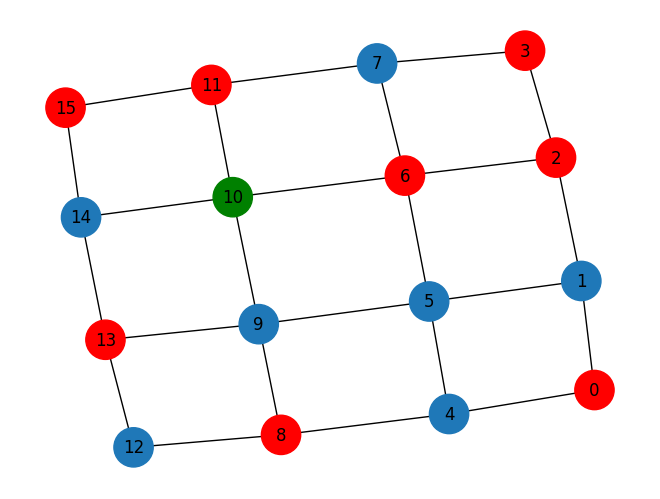

In [2]:
rede = Network()
controller = Controller(rede)
rede.set_ready_topology('grade', 8, 4, 4, clients=[13,8,2,6,0,3,11,15], server=10)  
rede.draw()


##### Nessa parte, eu posso gerar minha requesições, dos protocolos Childs(AC_BQC) e BFK_BQC.

##### O cenário 1 apresenta o agendamento das requesições de forma que pode-se executar protocolos em caminhos diferentes, porém no mesmo timeslot.

In [3]:
clientes = [13,8,2,6,0,3,11,15]

for _ in range(5):  # Escolha de quantas requisições serão feitas
    alice_id = random.choice(clientes)
    bob_id = 10
    num_qubits = 5
    num_gates = 20
    scenario = 1

    # Gere a requisição sem 'slice_path'
    request = rede.generate_request(
        alice_id=alice_id,
        bob_id=bob_id,
        num_qubits=num_qubits,
        num_gates=num_gates,
        scenario=scenario
    )
    controller.receive_request(request)

controller.process_requests()
controller.send_scheduled_requests()




        ┌───┐┌───┐                              ┌───┐        
q_0: ─■─┤ Z ├┤ Z ├──X───────────────────────────┤ X ├────────
      │ └───┘└───┘  │                           └─┬─┘   ┌───┐
q_1: ─┼────────X────┼──────────────■───■──────■───■───■─┤ S ├
      │ ┌───┐  │    │        ┌───┐ │   │      │       │ ├───┤
q_2: ─┼─┤ X ├──┼────X───■──X─┤ Y ├─■───┼───X──┼───────■─┤ Y ├
      │ ├───┤  │  ┌───┐ │  │ └───┘     │   │  │         └───┘
q_3: ─┼─┤ S ├──┼──┤ H ├─┼──┼───────────┼───┼──┼──────────────
      │ └───┘  │  └───┘ │  │         ┌─┴─┐ │  │ ┌───┐        
q_4: ─■────────X────────■──X─────────┤ X ├─X──■─┤ H ├────────
                                     └───┘      └───┘        
     ┌───┐             ┌───┐┌───┐     ┌───┐     ┌───┐
q_0: ┤ X ├──────────X──┤ Z ├┤ X ├──■──┤ Y ├──■──┤ T ├
     └───┘          │  └───┘└─┬─┘  │  └───┘┌─┴─┐└───┘
q_1: ──────────X────┼─────────┼────┼───────┤ X ├──■──
               │    │         │    │  ┌───┐└───┘┌─┴─┐
q_2: ──────X───┼────X─────────┼────■──┤ X ├─────

##### Nesse parte, pode-se gerar requesições de somente um protocolo.

In [4]:
clientes = [13,8,2,6,0,3,11,15]

for _ in range(5):
    alice_id = random.choice(clientes)
    bob_id = 0  
    num_qubits = 5
    num_gates = 20 
    scenario = 1  

    
    request = rede.generate_request(
        alice_id=alice_id,
        bob_id=bob_id,
        num_qubits=num_qubits,
        num_gates=num_gates,
        scenario=scenario
    )
    
    request['protocol'] = "AC_BQC"  # Define o protocolo a ser usado: "BFK_BQC" ou "AC_BQC"

    # Envia a requisição para o controlador
    controller.receive_request(request)

# Processa e executa as requisições
controller.process_requests()
controller.send_scheduled_requests()


     ┌───┐┌───┐               ┌───┐                  
q_0: ┤ Y ├┤ X ├────────────X──┤ Y ├──────────────────
     └───┘└───┘            │  ├───┤   ┌───┐          
q_1: ───────■─────────■────┼──┤ H ├─■─┤ X ├──■────■──
     ┌───┐  │         │    │  ├───┤ │ └─┬─┘  │    │  
q_2: ┤ T ├──┼────■────┼────X──┤ Y ├─┼───┼────┼────┼──
     └───┘  │    │    │  ┌───┐├───┤ │   │    │    │  
q_3: ───────┼────┼────■──┤ X ├┤ Z ├─┼───■────■────■──
            │  ┌─┴─┐┌───┐└───┘└───┘ │ ┌───┐┌───┐┌───┐
q_4: ───────■──┤ X ├┤ S ├───────────■─┤ H ├┤ Z ├┤ Z ├
               └───┘└───┘             └───┘└───┘└───┘
     ┌───┐                                                 
q_0: ┤ T ├─────■─────────X─────────────────────────────────
     ├───┤     │  ┌───┐  │                                 
q_1: ┤ T ├─■───■──┤ Y ├──X─────────────────────────────────
     ├───┤ │ ┌───┐└───┘                               ┌───┐
q_2: ┤ Z ├─┼─┤ Z ├──X────■─────────■───────────■──────┤ X ├
     ├───┤ │ └───┘  │    │         │          

##### Mostra o relatório de execução das requesições.

In [5]:
controller.generate_schedule_report()

=== Relatório de Requisições ===

Requisições Executadas:
- Alice ID: 11, Bob ID: 10, Nº de Qubits: 5, Circuit Depth: 14, Timeslot: 1
- Alice ID: 6, Bob ID: 10, Nº de Qubits: 5, Circuit Depth: 9, Timeslot: 1
- Alice ID: 11, Bob ID: 10, Nº de Qubits: 5, Circuit Depth: 12, Timeslot: 2
- Alice ID: 2, Bob ID: 10, Nº de Qubits: 5, Circuit Depth: 13, Timeslot: 2
- Alice ID: 11, Bob ID: 10, Nº de Qubits: 5, Circuit Depth: 12, Timeslot: 3
- Alice ID: 15, Bob ID: 0, Nº de Qubits: 5, Circuit Depth: 7, Timeslot: 264
- Alice ID: 6, Bob ID: 0, Nº de Qubits: 5, Circuit Depth: 8, Timeslot: 265

Requisições que falharam:
- Alice ID: 0, Bob ID: 0, Nº de Qubits: 5, Circuit Depth: 11, Rota: None, Motivo: Falha desconhecida
- Alice ID: 0, Bob ID: 0, Nº de Qubits: 5, Circuit Depth: 9, Rota: None, Motivo: Falha desconhecida
- Alice ID: 0, Bob ID: 0, Nº de Qubits: 5, Circuit Depth: 10, Rota: None, Motivo: Falha desconhecida

=== Fim do Relatório ===


{'success': 7,
 'failed': 3,
 'scheduled': 0,
 'failed_details': [{'alice_id': 0,
   'bob_id': 0,
   'num_qubits': 5,
   'circuit_depth': 11,
   'route': None,
   'reason': 'Falha desconhecida'},
  {'alice_id': 0,
   'bob_id': 0,
   'num_qubits': 5,
   'circuit_depth': 9,
   'route': None,
   'reason': 'Falha desconhecida'},
  {'alice_id': 0,
   'bob_id': 0,
   'num_qubits': 5,
   'circuit_depth': 10,
   'route': None,
   'reason': 'Falha desconhecida'}]}

##### Contabiliza quantos EPRs foram usados.

In [6]:
rede.get_total_useds_eprs()

135

##### Mostra a fidelidade das rotas utilizadas.

In [7]:
rede.application_layer.avg_fidelity_on_applicationlayer()

A média das fidelidades das rotas é: 0.9697


0.9697042408743802

In [8]:
rede.application_layer.print_route_fidelities()

Fidelidades das rotas utilizadas:
1.0000
0.9990
0.9980
0.9970
0.9960
0.9812
0.9802
0.9792
0.9782
0.9773
0.9942
0.9602
0.9925
0.9797
0.9258
0.9284
0.9100
0.9675
0.9527
0.9676
1.0000
0.9980
0.9960
0.9940
0.9920
0.9646
0.9627
0.9608
0.9588
0.9569
0.9820
0.9604
0.9840
0.9246
0.9463
1.0000
0.9940
0.9881
0.9822
0.9763
0.9305
0.9249
0.9194
0.9139
0.9084
1.0000
0.9970
0.9940
0.9910
0.9881
0.9617
0.9588
0.9560
0.9531
0.9503
